In [2]:
import pandas as pd
pd.set_option('display.max_columns',21)
dados = pd.read_excel('C:/Users/carlo/Documents\Projetos/Machine Learning Funções/Banco de dados/Pnad21.xlsx')

In [3]:
dados.head()

,Idade,Cor,Sexo,Regiao,Ocupacao,Renda,Escolaridade,Classe_Social
0,37,4,2,4,9.0,3.0,1.0,4
1,31,4,1,4,9.0,3.0,2.0,4
2,45,1,2,4,9.0,3.0,5.0,4
3,20,1,1,4,9.0,3.0,2.0,4
4,8,1,1,4,9.0,3.0,2.0,4


In [4]:
# Function Limpar Na
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.int64)

In [5]:
#Padroniza com int
clean_dataset(dados)
dados.astype('int64').dtypes

Idade            int64
Cor              int64
Sexo             int64
Regiao           int64
Ocupacao         int64
Renda            int64
Escolaridade     int64
Classe_Social    int64
dtype: object

In [6]:
#Definindo váriaveis preditoras e variavel target
y = dados['Classe_Social'] # Target
x = dados.drop('Classe_Social', axis =1) # Preditoras

In [12]:
#Função Decision Tree com Validação cruzada
def ExtraTreeKfold(x, y, n_kfold):
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.ensemble import ExtraTreesClassifier
    
    #Modelo
    extraTree = ExtraTreesClassifier() # Trocar parametros

    #kfold  
    kfold = KFold(n_splits = n_kfold)

 
    #Treino Resultados
    resul_extraTree = cross_val_score(extraTree,x,y, cv = kfold)

    
    #Printa Resultado
    print(f'Decision Tree:{resul_extraTree.mean()}')
    
    


In [13]:
 ExtraTreeKfold(x,y,5)

Decision Tree:0.9788902944808004


In [55]:
# Função com test_split
def ExtraTrees(x,y):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
        
    # Separando os dados em treino e teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)

    #Modelos
    extraTree = ExtraTreesClassifier() # Trocar parametros

    #Treinos
    x = extraTree.fit(x_treino, y_treino)

    
    #Resultados
    resul_extraTree = extraTree.score(x_teste, y_teste)

    print(f'Decision Tree:{resul_extraTree}')

Decision Tree:0.9795844277873876


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


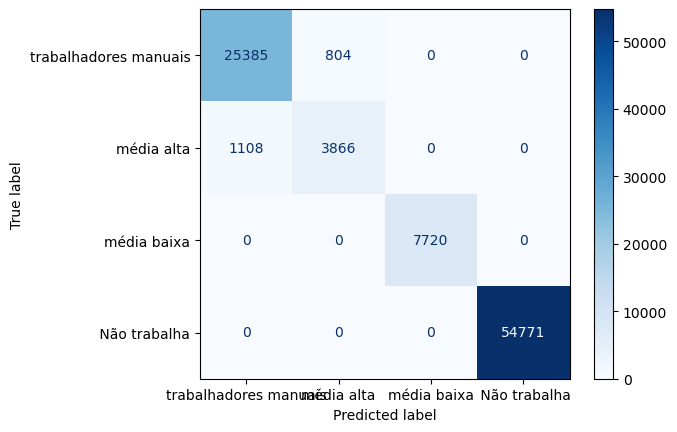

In [56]:
ExtraTrees(x,y)

In [59]:
### Modelo de matriz de confusão
def MatrizConfusão(x, y):
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import ConfusionMatrixDisplay
    
    #Modelos 
    from sklearn.ensemble import ExtraTreesClassifier

    # Nomeias as variaveis
    class_names = ["trabalhadores manuais","média alta","média baixa"," Não trabalha"]

    # Separa em treio e test
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    # Treina o modelo    
    modelo= ExtraTreesClassifier()
    classifier = modelo.fit(X_train, y_train)

    # Resultado do modelo
    score = classifier.score(X_test, y_test)
    print(f'Modelo:{score}\n')
    
    
    
    # Plot non-normalized confusion matrix
    titles_options = [
        ("Confusion matrix, Quantidade", None),
        ("\nConfusion matrix, Porcentagem", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Modelo:0.9796655775514126

Confusion matrix, Quantidade
[[21234   749     0     0]
 [  838  3313     0     0]
 [    0     0  6310     0]
 [    0     0     0 45601]]

Confusion matrix, Porcentagem
[[0.96592822 0.03407178 0.         0.        ]
 [0.20187907 0.79812093 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


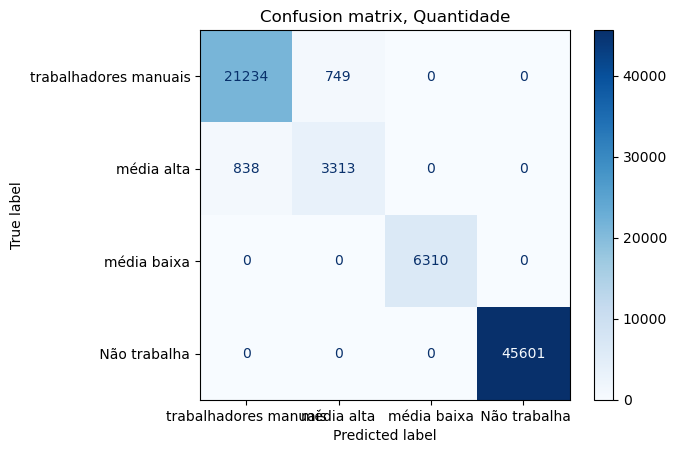

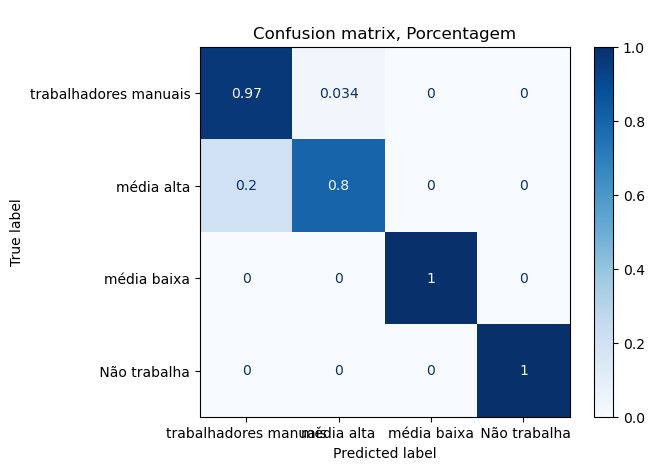

In [60]:
MatrizConfusão(x,y)